<div style="text-align: center"> <h1>Sentiment Analysis-Traditional Modelling </h1></div>

<div style="text-align: center"> <h1> Bharathi Ramapatnam x23425237 </h1></div>

<div style="text-align: center"> <h1>Data Mining and Machine Learning (MSCDAD)</h1></div>

# Table of Contents
1. [Install_Libraries](#Install_Libraries)
2. [Load Data](#Load_Data)
3. [WordNetLemmatizer](#WordNetLemmatizer)
4. [wordcloud](#wordcloud)
5. [Set rating conditon](#Set-rating-conditon)
6. [Data Modelling](#Data-Modelling)


In [ ]:
## Install_Libraries

In [42]:
#pip install textblob
#pip install vaderSentiment

In [ ]:
## All the steps performed here are same as SentimentAnalysis_remodel  

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [44]:
# https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# libraries for Bag of Words(BOW)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import make_pipeline
# import libraries for from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
import nltk
nltk.download('stopwords')  # Download stopwords
nltk.download('wordnet')    # Download wordnet
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
# https://medium.com/analytics-vidhya/nlp-getting-started-with-sentiment-analysis-126fcd61cc4a

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [47]:
%run C:/Users/prana/Documents/NCI/PythonWorkSpace/functionsMaster.ipynb

Current working directory: C:\Users\prana\Documents\NCI\PythonWorkSpace\WearableDevices


## Load_Data

In [49]:
df4 = pd.read_csv('../WearableDevices/Data/train_dataBagOfWords.csv')

# Convert the string to datetime format
df4['date'] = pd.to_datetime(df4['date'], format='%B %d, %Y')

# Extract the year
df4['year'] = df4['date'].dt.year

# Sort the DataFrame by the 'year' column
df4 = df4.sort_values(by='year')

# Print the sorted DataFrame
df4.tail()

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,year
6306,6306,112905,Bisacodyl,constipation,"""i had not had a bm in 8 days, i've never take...",10,2017-06-19,4,150,2017
1670,1670,118647,Drospirenone / ethinyl estradiol,menstrual disorders,"""recommended to me by gynae to manage pain whi...",2,2017-11-15,1,146,2017
3777,3777,176835,Adalimumab,rheumatoid arthritis,"""i'm a 69 yr old woman with seronegative ra - ...",6,2017-03-31,14,129,2017
6314,6314,45025,Fluoxetine,anxiety and stress,"""i just started taking 90mg once-weekly prozac...",8,2017-04-04,3,141,2017
2515,2515,205314,Pristiq,depression,"""it's an amazing drug. i have started having g...",9,2017-01-15,38,110,2017


## WordNetLemmatizer
- Lemmatization
- Removing Non-Alphabetical Characters
- Lowercasing
- Tokenization
- Stopword Removal

In [50]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation_col(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation_col(df4['review'])




In [51]:
# convert a string to a corpus
def text_transformation(input_text):
    new_item = re.sub('[^a-zA-Z]',' ', str(input_text))  # Remove non-alphabetic characters
    new_item = new_item.lower()  # Convert to lowercase
    new_item = new_item.split()  # Split into words
    
    # Lemmatize and remove stopwords
    new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
    
    # Join words back into a string
    return ' '.join(str(x) for x in new_item)
    
# Example of clean text 
example_text = "i've tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia & anxiety. my doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. thankfully i have had no side effects especially the most common - weight gain, i've actually lost alot of weight. i still have suicidal thoughts but mirtazapine has saved me."
processed_text = text_transformation(example_text)

print(processed_text)

tried antidepressant year citalopram fluoxetine amitriptyline none helped depression insomnia anxiety doctor suggested changed onto mg mirtazapine medicine saved life thankfully side effect especially common weight gain actually lost alot weight still suicidal thought mirtazapine saved


In [ ]:
## Example of clean text 

In [52]:
# Example of clean text 
example2_text = "i was on this for 5 years (and birth control pills for about 12 years), and would have told you how fabulous it was.  <list all the benefits everyone else has listed, here.>  then a friend of mine convinced me to stop birth control all together for a while, and i turned into a new and better person!  i dropped 5 lbs instantly, had a huge sex drive, more lubrication, and just felt better.  i wouldn't say i was depressed before, but after going off of it, i would describe my time on birth control as feeling like i was inside a cloud.  less emotions in general, sometimes a little down.  i'm bummed i'm back on it, but it seems to be the least impactful than the others.  i might try paragard to avoid the hormones."
processed_text = text_transformation(example2_text)

print(processed_text)

year birth control pill year would told fabulous list benefit everyone else listed friend mine convinced stop birth control together turned new better person dropped lb instantly huge sex drive lubrication felt better say depressed going would describe time birth control feeling like inside cloud less emotion general sometimes little bummed back seems least impactful others might try paragard avoid hormone


## wordcloud

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)


## Set-rating-conditon 
- positive if rating >= 7, negative if rating < 7

In [54]:
#BOW 
# Convert rating to binary sentiment (positive if rating >= 7, negative if rating < 7)
df4['sentiment'] = df4['rating'].apply(lambda x: 1 if x >= 7 else 0)


In [55]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df4.sentiment

In [56]:
# check the type of the document-term matrix
print(type(traindata))

# examine the sparse matrix contents
print(traindata)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 230835)	1
  (0, 212964)	1
  (0, 14871)	1
  (0, 77917)	1
  (0, 246326)	2
  (0, 64192)	1
  (0, 60062)	1
  (0, 190949)	1
  (0, 133382)	1
  (0, 14899)	1
  (0, 231215)	1
  (0, 212965)	1
  (0, 14873)	1
  (0, 77929)	1
  (0, 246591)	1
  (0, 64261)	1
  (0, 60521)	1
  (0, 191265)	1
  (0, 133436)	1
  (0, 15181)	1
  (1, 246326)	3
  (1, 52392)	2
  (1, 26272)	1
  (1, 218891)	1
  (1, 187916)	1
  :	:
  (9997, 84654)	1
  (9997, 61198)	1
  (9997, 142170)	1
  (9997, 187967)	1
  (9997, 130537)	1
  (9997, 243064)	1
  (9997, 167484)	1
  (9997, 5697)	1
  (9997, 157979)	1
  (9997, 4090)	1
  (9997, 209771)	1
  (9997, 236134)	1
  (9997, 167496)	1
  (9997, 138483)	1
  (9997, 167464)	1
  (9997, 83336)	1
  (9997, 12682)	1
  (9997, 167510)	1
  (9997, 118581)	1
  (9997, 97416)	1
  (9997, 3806)	1
  (9997, 59592)	1
  (9997, 203983)	1
  (9997, 247825)	1
  (9997, 128384)	1


## Data-Modelling 
- Random Forest Accuracy: 0.697 
- Naive Bayes Accuracy: 0.7615 
- SVM Accuracy: 0.779 
- Decision Tree Accuracy: 0.6565

## Outcome of RF, SVC , Decicion Tree and Naive Bayse
* We are not using any scoring method on review column unlike RoBERTa and VADAR
* We are doing text processing to remove stop words, special characters,  et., 
* We are using the orignal Rating column as y variable 
* Rating >= 7 is 1 else its 0 - Rule applied to rating column 

Random Forest Accuracy: 0.697
Naive Bayes Accuracy: 0.7615
SVM Accuracy: 0.779
Decision Tree Accuracy: 0.6565

In [57]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.15      0.25       692
           1       0.69      0.99      0.81      1308

    accuracy                           0.70      2000
   macro avg       0.78      0.57      0.53      2000
weighted avg       0.75      0.70      0.62      2000



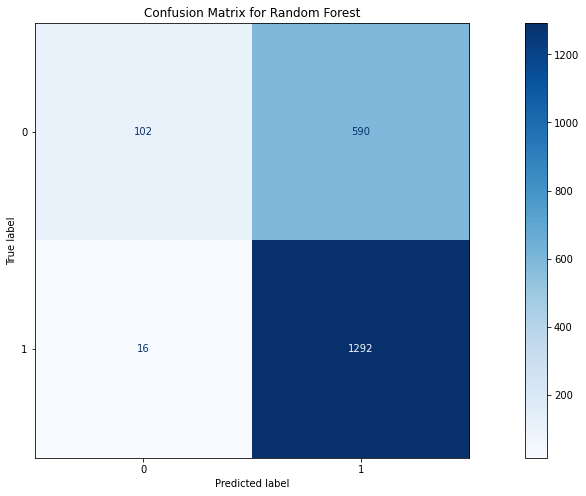


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59       692
           1       0.77      0.90      0.83      1308

    accuracy                           0.76      2000
   macro avg       0.75      0.70      0.71      2000
weighted avg       0.76      0.76      0.75      2000



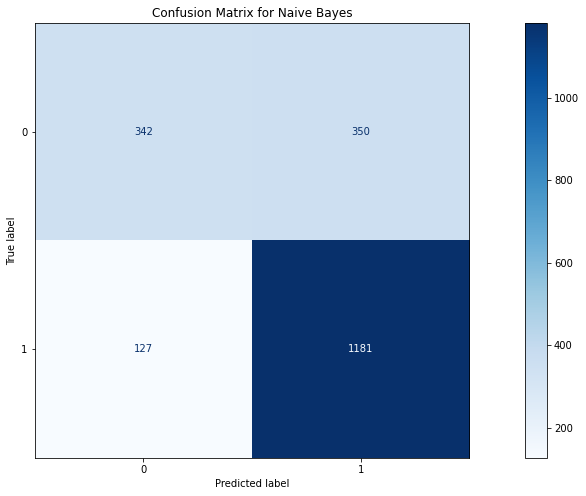


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       692
           1       0.82      0.86      0.84      1308

    accuracy                           0.78      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.78      0.78      0.78      2000



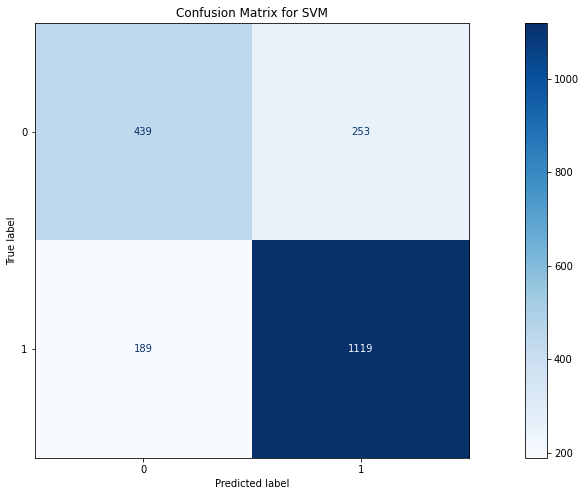


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       692
           1       0.72      0.77      0.74      1308

    accuracy                           0.66      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.65      0.66      0.65      2000



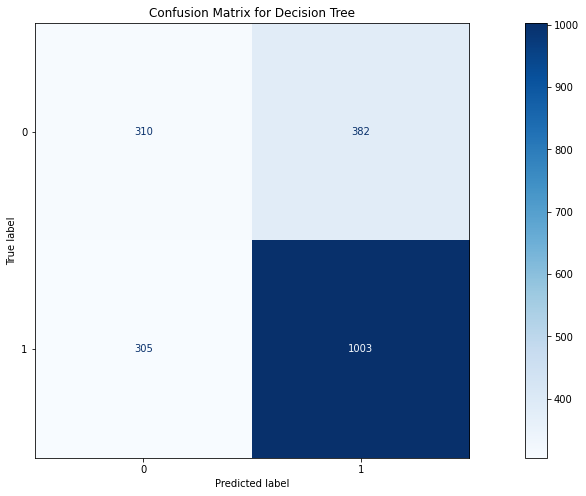

Random Forest Accuracy: 0.697
Naive Bayes Accuracy: 0.7615
SVM Accuracy: 0.779
Decision Tree Accuracy: 0.6565


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier()  
}

accuracy_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    
 # Print the classification report for each model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
 # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # Plot Confusion Matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    

    

# Print accuracy results
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name} Accuracy: {accuracy}')

In [27]:
# https://www.kaggle.com/code/fahadmehfoooz/sentiment-analysis-svm-nb-bagging-boosting-rf-lstm
# check the performance of   TfidfVectorizer  
# TfidfVectorizer 
cv = TfidfVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df4.sentiment


In [28]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
nb = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 23.5 ms


MultinomialNB()

In [30]:
# Step 6: Predict using the test set
y_pred = nb.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6615
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.66      1.00      0.80      1323

    accuracy                           0.66      2000
   macro avg       0.33      0.50      0.40      2000
weighted avg       0.44      0.66      0.53      2000



In [37]:
 #Provided text (as a list of documents)
# Sample of countVecorizer

text = ["year birth control pill year would told fabulous list benefit everyone else listed friend mine convinced stop birth control together turned new better person dropped lb instantly huge sex drive lubrication felt better say depressed going would describe time birth control feeling like inside cloud less emotion general sometimes little bummed back seems least impactful others might try paragard avoid hormone"]

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')  # Remove common English stopwords

# Fit and transform the text into a document-term matrix (DTM)
X = vectorizer.fit_transform(text)

# Convert the matrix to a DataFrame for better visualization
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(df)

   avoid  benefit  better  birth  bummed  cloud  control  convinced  \
0      1        1       2      3       1      1        3          1   

   depressed  drive  ...  person  pill  say  sex  stop  time  told  try  \
0          1      1  ...       1     1    1    1     1     1     1    1   

   turned  year  
0       1     2  

[1 rows x 41 columns]


In [38]:


# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')  # Remove common English stopwords

# Fit and transform the text into a weighted document-term matrix (DTM)
X = vectorizer.fit_transform(text)

# Convert the matrix to a DataFrame for better visualization
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(df)

      avoid   benefit    better     birth    bummed     cloud   control  \
0  0.125988  0.125988  0.251976  0.377964  0.125988  0.125988  0.377964   

   convinced  depressed     drive  ...    person      pill       say  \
0   0.125988   0.125988  0.125988  ...  0.125988  0.125988  0.125988   

        sex      stop      time      told       try    turned      year  
0  0.125988  0.125988  0.125988  0.125988  0.125988  0.125988  0.251976  

[1 rows x 41 columns]


In [65]:
# Read the dataset scored by roberta 
df5 = pd.read_csv('../WearableDevices/Data/output/results_df_remodel.csv')
df5.head()

,patient_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_length,polarity,subjectivity
0,163740,0.204,0.629,0.167,-0.5267,0.051659,0.215859,0.732482,0,Mirtazapine,depression,"""i've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22,68,0.00,0.44
1,206473,0.040,0.802,0.158,0.7539,0.005852,0.032559,0.961589,1,Mesalamine,"crohn's disease, maintenance","""my son has crohn's disease and has done very ...",8.0,"May 17, 2009",17,48,0.57,0.60
2,39293,0.036,0.884,0.080,0.6810,0.121121,0.390692,0.488187,2,Contrave,weight loss,"""contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,143,0.14,0.50
3,97768,0.036,0.825,0.139,0.9559,0.007385,0.023811,0.968803,3,Cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9.0,"October 22, 2015",4,149,0.26,0.55
4,208087,0.065,0.802,0.133,0.6924,0.020878,0.116143,0.862979,4,Zyclara,keratosis,"""4 days in on first 2 weeks. using on arms an...",4.0,"July 3, 2014",13,60,0.34,0.69
